Original Metrics:
MSE: 0.0209, PSNR: 16.81 dB, SSIM: 0.7371

After Histogram Matching:
MSE: 0.0131, PSNR: 18.83 dB, SSIM: 0.7720


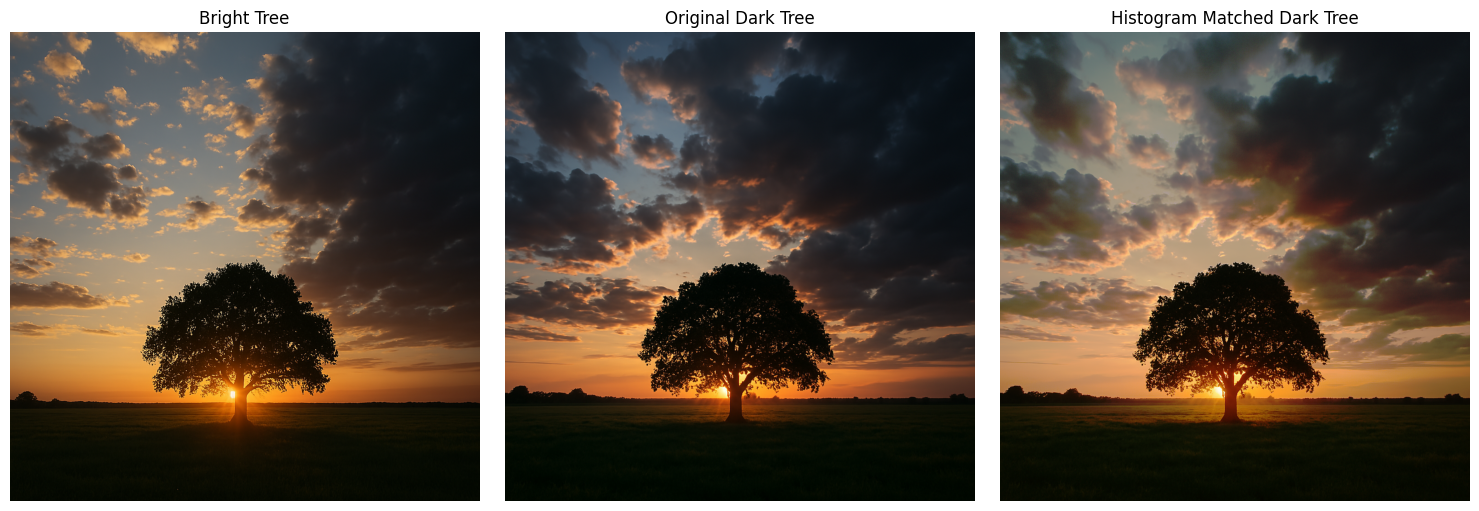

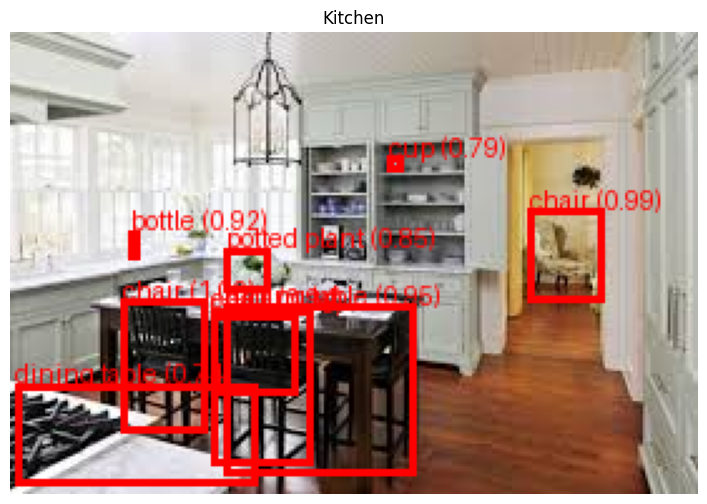

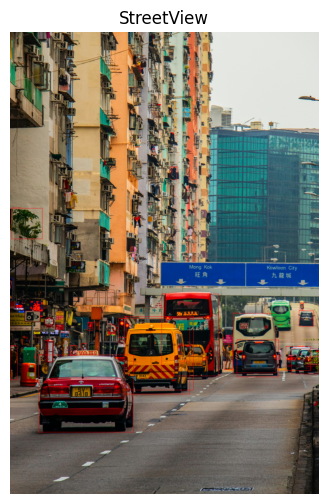

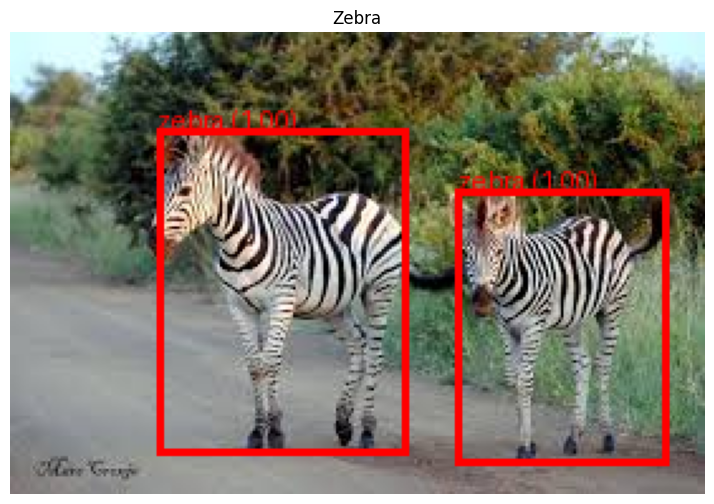

In [1]:

# Homework 6: Image Similarity & Object Detection

## Task A: Image Similarity - Bright_Tree vs. Dark_Tree

from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity
from skimage.io import imread
from skimage.transform import resize
from skimage.exposure import match_histograms
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Load and resize images
bright_tree = imread("/Users/tanuj/Desktop/Bright_Tree.png")
dark_tree = imread("/Users/tanuj/Desktop/Dark_Tree.png")

min_shape = (
    min(bright_tree.shape[0], dark_tree.shape[0]),
    min(bright_tree.shape[1], dark_tree.shape[1])
)

bright_tree_resized = resize(bright_tree, min_shape, anti_aliasing=True)
dark_tree_resized = resize(dark_tree, min_shape, anti_aliasing=True)


bright_tree_gray = rgb2gray(bright_tree_resized)
dark_tree_gray = rgb2gray(dark_tree_resized)


mse_orig = mean_squared_error(bright_tree_resized, dark_tree_resized)
psnr_orig = peak_signal_noise_ratio(bright_tree_resized, dark_tree_resized)
ssim_orig = structural_similarity(bright_tree_gray, dark_tree_gray, data_range=bright_tree_gray.max() - bright_tree_gray.min())


dark_tree_matched = match_histograms(dark_tree_resized, bright_tree_resized, channel_axis=-1)
dark_tree_gray_matched = rgb2gray(dark_tree_matched)


mse_matched = mean_squared_error(bright_tree_resized, dark_tree_matched)
psnr_matched = peak_signal_noise_ratio(bright_tree_resized, dark_tree_matched)
ssim_matched = structural_similarity(bright_tree_gray, dark_tree_gray_matched, data_range=bright_tree_gray.max() - bright_tree_gray.min())


print("Original Metrics:")
print(f"MSE: {mse_orig:.4f}, PSNR: {psnr_orig:.2f} dB, SSIM: {ssim_orig:.4f}")
print("\nAfter Histogram Matching:")
print(f"MSE: {mse_matched:.4f}, PSNR: {psnr_matched:.2f} dB, SSIM: {ssim_matched:.4f}")


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(bright_tree_resized)
axs[0].set_title("Bright Tree")
axs[0].axis("off")
axs[1].imshow(dark_tree_resized)
axs[1].set_title("Original Dark Tree")
axs[1].axis("off")
axs[2].imshow(dark_tree_matched)
axs[2].set_title("Histogram Matched Dark Tree")
axs[2].axis("off")
plt.tight_layout()
plt.show()

## Task B: Object Detection using Faster R-CNN

import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw

# Load model with recommended weights
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = weights.meta["categories"]


image_paths = {
    "Kitchen": "/Users/tanuj/Desktop/Kitchen.jpg",
    "StreetView": "/Users/tanuj/Desktop/StreetView.jpg",
    "Zebra": "/Users/tanuj/Desktop/Zebra.jpg"
}


def detect_and_display(image_path, title, threshold=0.7):
    image = Image.open(image_path).convert("RGB")
    image_tensor = F.to_tensor(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(image_tensor)[0]

    draw = ImageDraw.Draw(image)
    for box, label, score in zip(outputs["boxes"], outputs["labels"], outputs["scores"]):
        if score >= threshold:
            box = box.tolist()
            label_text = f"{COCO_INSTANCE_CATEGORY_NAMES[label]} ({score:.2f})"
            draw.rectangle(box, outline="red", width=3)
            draw.text((box[0], box[1] - 10), label_text, fill="red")

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()


for title, path in image_paths.items():
    detect_and_display(path, title)
